# 1. Dataset Analysis

In [18]:
import pandas as pd
dataset_path = 'C:/Users/HP/Hate Speech Detection/Project/Dataset.csv'

In [19]:
# Load the dataset
try:
    dataset = pd.read_csv(dataset_path, encoding='latin1')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"File not found at path: {dataset_path}. Please check the file path.")

Dataset loaded successfully!


In [20]:
# Analyze the dataset
if 'dataset' in locals():
    # Display the number of rows and columns
    rows, cols = dataset.shape
    print(f"Number of rows: {rows}")
    print(f"Number of columns: {cols}")

    # Display the first few rows
    print("\nFirst few rows of the dataset:")
    print(dataset.head())

    # Check for missing values
    print("\nMissing values in each column:")
    print(dataset.isnull().sum())

    # Summary of the 'label' column
    if 'label' in dataset.columns:
        print("\nSummary of the 'label' column:")
        print(dataset['label'].value_counts())

    # Validate that the dataset contains the expected columns
    expected_columns = {'tweet', 'label'}
    if set(dataset.columns) >= expected_columns:
        print("\nThe dataset contains the required columns: 'tweet' and 'label'.")
    else:
        print("\nThe dataset is missing required columns. Please check the file.")

Number of rows: 10208
Number of columns: 2

First few rows of the dataset:
                                               tweet  label
0  bhaunk bhaunk ke pagal ho jaata ab tak....@Ali...      0
1  shivsaina  nam mulla  saina  rakh  hijra  uddh...      0
2  there are some yahodi daboo like imran chore z...      0
3  chutiye ye hunduism ni he islam he , isme koi ...      0
4  han g rakhail e awal kiya bak rai hai. kisay a...      0

Missing values in each column:
tweet    0
label    0
dtype: int64

Summary of the 'label' column:
label
1    5350
0    4858
Name: count, dtype: int64

The dataset contains the required columns: 'tweet' and 'label'.


# 2. Preprocessing

In [2]:
#Importing necessary libraries

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import sklearn
!pip install scikit-learn==1.6.0


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
print("nltk version:", nltk.__version__)
print("scikit-learn version", sklearn.__version__)

nltk version: 3.8.1
scikit-learn version 1.6.0


In [4]:
#Loading the dataset
file_path = "C:/Users/HP/Hate Speech Detection/Project/Dataset.csv"
dataset = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows
dataset.head()


,tweet,label
0,bhaunk bhaunk ke pagal ho jaata ab tak....@Ali...,0
1,shivsaina nam mulla saina rakh hijra uddh...,0
2,there are some yahodi daboo like imran chore z...,0
3,"chutiye ye hunduism ni he islam he , isme koi ...",0
4,han g rakhail e awal kiya bak rai hai. kisay a...,0


In [5]:
# Display dataset summary: rows, columns, and label counts
print(f"Number of rows: {dataset.shape[0]}")
print(f"Number of columns: {dataset.shape[1]}")

# Count the occurrences of each label
label_counts = dataset['label'].value_counts()
print("\nLabel counts:")
print(f"Label 0 (Hateful Tweets): {label_counts.get(0, 0)}")
print(f"Label 1 (Normal Tweets): {label_counts.get(1, 0)}")

Number of rows: 10208
Number of columns: 2

Label counts:
Label 0 (Hateful Tweets): 4858
Label 1 (Normal Tweets): 5350


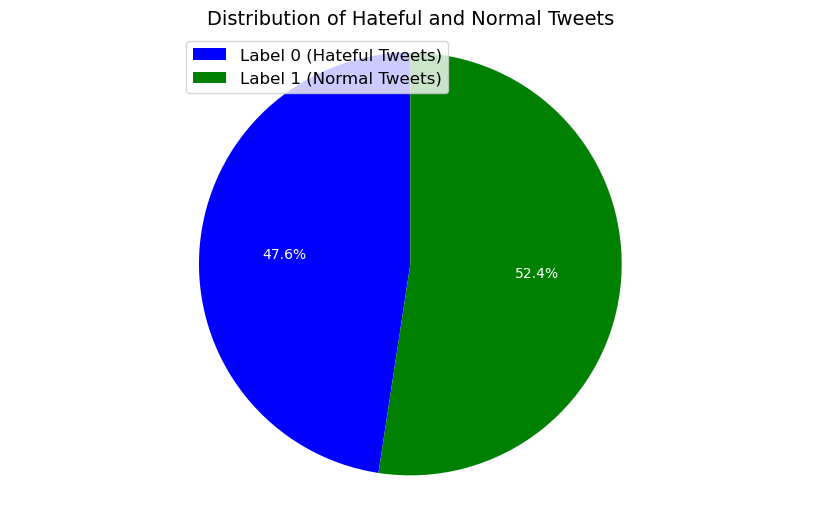

In [6]:
import matplotlib.pyplot as plt

# Pie chart for the distribution of classes
plt.figure(figsize=(6, 6))
label_counts = [4858, 5350]  # Counts for Hateful and Normal tweets
plt.pie(label_counts, labels=['Label 0 (Hateful Tweets)', 'Label 1 (Normal Tweets)'], autopct='%1.1f%%', startangle=90, colors=['blue', 'green'], textprops={'color': 'white'})

# Add legend with color labels
plt.legend(['Label 0 (Hateful Tweets)', 'Label 1 (Normal Tweets)'], loc='upper left', fontsize=12)

plt.title('Distribution of Hateful and Normal Tweets', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [7]:
#Defining functions for preprocessing

# Function to remove special characters, mentions, and URLs
def remove_special_characters(text):
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove non-alphanumeric characters
    return text

# Function to normalize text (lowercase)
def normalize_text(text):
    return text.lower()

# Function to remove stop words
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))  # Can be expanded for Roman Urdu stopwords
    words = word_tokenize(text)
    filtered_text = ' '.join([word for word in words if word not in stop_words])
    return filtered_text

# Function to tokenize text
def tokenize_text(text):
    return word_tokenize(text)


In [8]:
#Applying preprocessing to the dataset

# Remove special characters, normalize text, and remove stopwords
dataset['preprocessed_tweet'] = dataset['tweet'].apply(remove_special_characters)
dataset['preprocessed_tweet'] = dataset['preprocessed_tweet'].apply(normalize_text)
dataset['preprocessed_tweet'] = dataset['preprocessed_tweet'].apply(remove_stop_words)

# Tokenize the preprocessed text
dataset['tokens'] = dataset['preprocessed_tweet'].apply(tokenize_text)

# Display the updated dataset
dataset.head()

,tweet,label,preprocessed_tweet,tokens
0,bhaunk bhaunk ke pagal ho jaata ab tak....@Ali...,0,bhaunk bhaunk ke pagal ho jaata ab tak,"[bhaunk, bhaunk, ke, pagal, ho, jaata, ab, tak]"
1,shivsaina nam mulla saina rakh hijra uddh...,0,shivsaina nam mulla saina rakh hijra uddhav th...,"[shivsaina, nam, mulla, saina, rakh, hijra, ud..."
2,there are some yahodi daboo like imran chore z...,0,yahodi daboo like imran chore zakat khore,"[yahodi, daboo, like, imran, chore, zakat, khore]"
3,"chutiye ye hunduism ni he islam he , isme koi ...",0,chutiye ye hunduism ni islam isme koi kisi mus...,"[chutiye, ye, hunduism, ni, islam, isme, koi, ..."
4,han g rakhail e awal kiya bak rai hai. kisay a...,0,han g rakhail e awal kiya bak rai hai kisay ah...,"[han, g, rakhail, e, awal, kiya, bak, rai, hai..."


In [9]:
# Saving the preprocessed dataset
preprocessed_file_path = r"C:\Users\HP\Hate Speech Detection\Project\Preprocessed_Dataset.csv"
dataset.to_csv(preprocessed_file_path, index=False)

print(f"Preprocessed dataset saved to {preprocessed_file_path}")

Preprocessed dataset saved to C:\Users\HP\Hate Speech Detection\Project\Preprocessed_Dataset.csv


# 3. Machine Learning Model Building

In [11]:
#Import libraries for machine learning

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [12]:
#Loading the preprocessed dataset
preprocessed_file_path = r"C:\Users\HP\Hate Speech Detection\Project\Preprocessed_Dataset.csv"
data = pd.read_csv(preprocessed_file_path)

# Display the first few rows
data.head()

,tweet,label,preprocessed_tweet,tokens
0,bhaunk bhaunk ke pagal ho jaata ab tak....@Ali...,0,bhaunk bhaunk ke pagal ho jaata ab tak,"['bhaunk', 'bhaunk', 'ke', 'pagal', 'ho', 'jaa..."
1,shivsaina nam mulla saina rakh hijra uddh...,0,shivsaina nam mulla saina rakh hijra uddhav th...,"['shivsaina', 'nam', 'mulla', 'saina', 'rakh',..."
2,there are some yahodi daboo like imran chore z...,0,yahodi daboo like imran chore zakat khore,"['yahodi', 'daboo', 'like', 'imran', 'chore', ..."
3,"chutiye ye hunduism ni he islam he , isme koi ...",0,chutiye ye hunduism ni islam isme koi kisi mus...,"['chutiye', 'ye', 'hunduism', 'ni', 'islam', '..."
4,han g rakhail e awal kiya bak rai hai. kisay a...,0,han g rakhail e awal kiya bak rai hai kisay ah...,"['han', 'g', 'rakhail', 'e', 'awal', 'kiya', '..."


In [13]:
#Split dataset into features and labels
X = data['preprocessed_tweet']  # Features (preprocessed text)
y = data['label']               # Labels (0 or 1)

# Convert text data to numerical form using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (8166, 5000)
Test set size: (2042, 5000)


In [ ]:
vectorizer.pkl code

## Logistic Regression

In [14]:
# Train and evaluate Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic) * 100  # Convert to percentage
print(f"Logistic Regression Accuracy: {accuracy_logistic:.2f}%")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy: 88.10%
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       968
           1       0.86      0.93      0.89      1074

    accuracy                           0.88      2042
   macro avg       0.88      0.88      0.88      2042
weighted avg       0.88      0.88      0.88      2042



## Naive Bayes (MultinomialNB)

In [15]:
# Train and evaluate Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluate model
accuracy_nb = accuracy_score(y_test, y_pred_nb) * 100  # Convert to percentage
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}%")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 87.37%
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       968
           1       0.86      0.90      0.88      1074

    accuracy                           0.87      2042
   macro avg       0.87      0.87      0.87      2042
weighted avg       0.87      0.87      0.87      2042



## Support Vector Machines (SVM)

In [16]:
# Train and evaluate SVM
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluate model
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100  # Convert to percentage
print(f"SVM Accuracy: {accuracy_svm:.2f}%")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 89.23%
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       968
           1       0.88      0.92      0.90      1074

    accuracy                           0.89      2042
   macro avg       0.89      0.89      0.89      2042
weighted avg       0.89      0.89      0.89      2042



## Random Forest

In [17]:
# Import the confusion_matrix function
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train and evaluate Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100  # Convert to percentage
print(f"Random Forest Accuracy: {accuracy_rf:.2f}%")
print(classification_report(y_test, y_pred_rf))

# Print classification report for precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Hateful', 'Normal']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(cm)

Random Forest Accuracy: 92.80%
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       968
           1       0.92      0.94      0.93      1074

    accuracy                           0.93      2042
   macro avg       0.93      0.93      0.93      2042
weighted avg       0.93      0.93      0.93      2042


Classification Report:
              precision    recall  f1-score   support

     Hateful       0.93      0.91      0.92       968
      Normal       0.92      0.94      0.93      1074

    accuracy                           0.93      2042
   macro avg       0.93      0.93      0.93      2042
weighted avg       0.93      0.93      0.93      2042


Confusion Matrix:
[[ 883   85]
 [  62 1012]]


In [25]:
# Extract precision, recall, F1-score for each class
report_dict = classification_report(y_test, y_pred_rf, output_dict=True)

# Access precision, recall, and F1-score for 'Hateful' (class 0) and 'Normal' (class 1)
precision_rf_hateful = report_dict['0']['precision']
recall_rf_hateful = report_dict['0']['recall']
f1_score_rf_hateful = report_dict['0']['f1-score']

precision_rf_normal = report_dict['1']['precision']
recall_rf_normal = report_dict['1']['recall']
f1_score_rf_normal = report_dict['1']['f1-score']

# Print extracted precision, recall, and F1-score for each class
print(f"\nPrecision (Hateful): {precision_rf_hateful:.2f}")
print(f"Recall (Hateful): {recall_rf_hateful:.2f}")
print(f"F1-Score (Hateful): {f1_score_rf_hateful:.2f}")

print(f"\nPrecision (Normal): {precision_rf_normal:.2f}")
print(f"Recall (Normal): {recall_rf_normal:.2f}")
print(f"F1-Score (Normal): {f1_score_rf_normal:.2f}")


Precision (Hateful): 0.93
Recall (Hateful): 0.91
F1-Score (Hateful): 0.92

Precision (Normal): 0.92
Recall (Normal): 0.94
F1-Score (Normal): 0.93


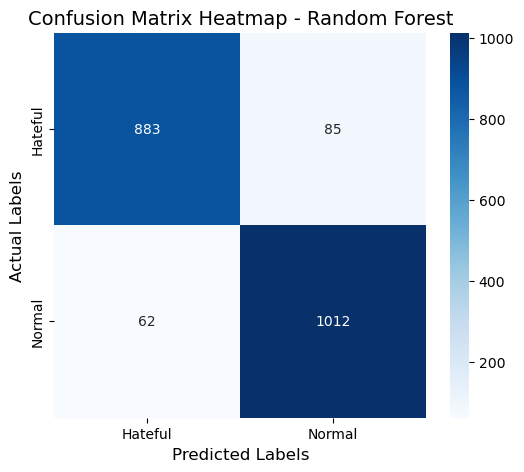

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Hateful', 'Normal'], yticklabels=['Hateful', 'Normal'])
plt.title('Confusion Matrix Heatmap - Random Forest', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('Actual Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


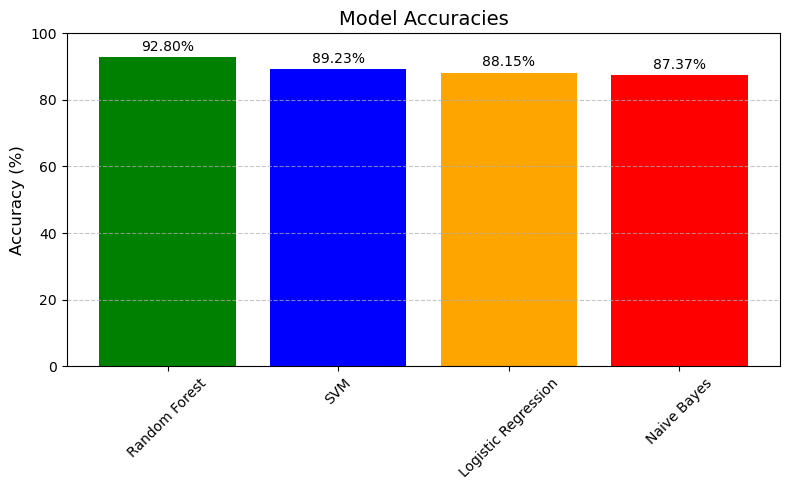

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Model accuracies (replace these with your actual results)
model_names = ['Random Forest', 'SVM', 'Logistic Regression', 'Naive Bayes']
accuracies = [92.80, 89.23, 88.10, 87.37]  # In percentage

# Sort the models and accuracies in descending order
sorted_indices = np.argsort(accuracies)[::-1]
sorted_model_names = [model_names[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]

# Plot the bar graph
plt.figure(figsize=(8, 5))
bars = plt.bar(sorted_model_names, sorted_accuracies, color=['green', 'blue', 'orange', 'red'])
plt.ylim(0, 100)

# Add data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center the text horizontally
        height + 1,                        # Slightly above the bar
        f"{height:.2f}%",                  # Display the accuracy as a percentage
        ha='center',                       # Horizontal alignment
        va='bottom',                       # Vertical alignment
        fontsize=10,                       # Font size
        color='black'                      # Text color
    )

# Add titles and labels
plt.title('Model Accuracies', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the graph
plt.tight_layout()
plt.show()


# check the accuracy for confirmation

In [20]:
print(vectorizer)

TfidfVectorizer(max_features=5000)


# saving model.pkl and vectorizer.pkl

In [21]:
import pickle

# Define a specific path
save_path = 'C:/Users/HP/Hate Speech Detection/flask/models/vectorizer.pkl'

# Save the trained vectorizer
with open(save_path, 'wb') as file:
    pickle.dump(vectorizer, file)

print(f"Vectorizer saved at {save_path}")

Vectorizer saved at C:/Users/HP/Hate Speech Detection/flask/models/vectorizer.pkl


In [22]:
save_path2 = 'C:/Users/HP/Hate Speech Detection/flask/models/model.pkl'

# Save the trained Random Forest model as a .pkl file
with open(save_path2, 'wb') as file:
    pickle.dump(rf_model, file)

print(f"Model saved as model.pkl at {save_path2}")

Model saved as model.pkl at C:/Users/HP/Hate Speech Detection/flask/models/model.pkl


# Real Time Prediction Random forest

In [25]:
import pickle

# Paths to the model and vectorizer files
model_path = 'C:/Users/HP/Hate Speech Detection/flask/models/model.pkl'
vectorizer_path = 'C:/Users/HP/Hate Speech Detection/flask/models/vectorizer.pkl'

# Load the trained Random Forest model
with open(model_path, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load the TfidfVectorizer
with open(vectorizer_path, 'rb') as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

# Function for preprocessing text
def transform_text(text):
    import nltk
    from nltk.corpus import stopwords
    from nltk.stem.porter import PorterStemmer
    import string

    nltk.download('punkt')
    nltk.download('stopwords')

    ps = PorterStemmer()
    
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    words = nltk.word_tokenize(text)
    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]
    # Remove stopwords and punctuation
    words = [word for word in words if word not in stopwords.words('english') and word not in string.punctuation]
    # Stem words
    words = [ps.stem(word) for word in words]
    
    return " ".join(words)

# Example input tweet
example_input = ["phuddi da imran harami"]  # Replace with real data

# Preprocess the input text
transformed_input = transform_text(example_input[0])

# Convert the preprocessed text into a numerical vector
vectorized_input = vectorizer.transform([transformed_input])

# Predict the class using the loaded model
predicted_class = loaded_model.predict(vectorized_input)

# Display the prediction result
if predicted_class[0] == 1:
    print("Predicted class: Normal Tweet")
else:
    print("Predicted class: Hateful Tweet")


Predicted class: Hateful Tweet


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
print("nltk version:", nltk.__version__)
print("scikit-learn version", sklearn.__version__)

nltk version: 3.8.1
scikit-learn version 1.6.0
